## Clustering Jerárquico usando Eucludian Distance

### Tarea 1: Introducción: Ampliación del análisis de sesgo   

Se utilizan seis sesgos de diferentes combinaciones de dos nucleótidos: CA-, GA-, UA-, UG-, UC- y CG para dibujar lo que se conoce como **perfil de sesgo (skew profile)**. El perfil de sesgo se representa usando valores **acumulativos** de sesgos y se determina por **composición** de nucleótidos, no por la secuencia. A pesar de los beneficios de este método para conocer el perfil del genoma, uno de sus defectos es la falta de una comparación cuantitativa entre más de un genoma. Esto se está superando con técnicas adicionales como la [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) matrices y [Neighbor-joining](https://en.wikipedia.org/wiki/Neighbor_joining) árboles (de decisión). 

Los siguientes veinte gráficos de perfil sesgado representan diferentes cepas de siete virus, virus Corona y SARS obtenidos de la familia [Coronaviridae](https://en.wikipedia.org/wiki/Coronaviridae), en tanto que Dengue, Zika, y el virus del Nilo se obtienen de la familia [Flaviviridae](https://en.wikipedia.org/wiki/Flaviviridae). A su vez, Enterovirus de la familia [Picornaviridae](https://en.wikipedia.org/wiki/Picornavirus), y VIH de de [Retroviridae](https://en.wikipedia.org/w/index.php?title=Retroviridae&redirect=yes). Todos estos virus pertenecen al reino [Riboviria](https://en.wikipedia.org/wiki/Riboviria).  

<table><tr><td><img src='images/Corona_HCoV-NL63.png'></td><td><img src='images/Corona_MN988668_China.png'></td></tr></table>
<table><tr><td><img src='images/Corona_MT755827_Bangladesh.png'></td><td><img src='images/Corona_MT759582.1_India.png'></td></tr></table>
<table><tr><td><img src='images/Corona_MT766907.1_USA.png'></td><td><img src='images/Corona_NC_045512_China.png'></td></tr></table>
<table><tr><td><img src='images/SARS_BJ01.png'></td><td><img src='images/SARS_BJ02.png'></td></tr></table>
<table><tr><td><img src='images/SARS_BJ03.png'></td><td><img src='images/SARS_BJ04.png'></td></tr></table>
<table><tr><td><img src='images/Dengue_MT862858.png'></td><td><img src='images/Dengue_MT862893.png'></td></tr></table>

<table><tr><td><img src='images/EnterovirusA_NC038306.png'></td><td><img src='images/EnterovirusB_NC038307.png'></td></tr></table>
<table><tr><td><img src='images/EnterovirusD_NC038308.png'></td><td><img src='images/EnterovirusH_NC038309.png'></td></tr></table>
<table><tr><td><img src='images/HIV_NC001802.1.png'></td><td><img src='images/WestNile_NC009942.png'></td></tr></table>

<table><tr><td><img src='images/Zika_AY632535.png'></td><td><img src='images/Zika_MN101548.png'></td></tr></table>


Si se trata de comparar los 20 gráficos anteriores entre sí, se sabe que es una tarea dificil y casi imposible lograrlo a primera vista. Esto puede ser superado, utilizando los datos de sesgo del perfil, como el que se muestra en la siguiente tabla, y calculando las diferencias euclidianas entre ellos y se construye un [dendrogram](https://en.wikipedia.org/wiki/Dendrogram) basado en el algoritmo de árbol de unión de vecinos, que muestra la diferencia y similitud entre los diferentes virus.

No. | virus | strain (cepa) |CA-Skew | GA-Skew | UA-Skew | UG-Skew | UC-Skew | CG-Skew*  
----| :-------- | :-- | -- | -- | -- | -- |----------| ---------
1. | **Corona** | HCoV-NL63 |-8892.72|-13454.38|-5947.28|8392.05|3165.32 |5417.59  
2. | **SARS** | BJ01 |-4673.66|-5852.78|-1008.29|4887.03|3697.07 |1216.47  
3. | **Dengue** | MT862858 |816.63|-351.01|1728.46|2067.33|926.05 |1164.02  
4. | **Enterovirus A** | NC038306 |33.56|201.33|429.91|229.41|397.55 |-165.63  
5. | **HIV** | NC001802 |447.21|-939.66|2171.98|3040.84|1749.07 |1384.04  
6. | **West Nile** | NC009942 |1324.54|-57.23|1054.20|1111.13|-273.42 |1382.03  
7. | **Zika** | AY632535 |1381.19|-283.89|1147.27|1432.18|-237.85 |1663.35  


  *Cabe señalar que, en lenguaje sesgado, CG no representa un par de bases CG sino una comparación de las proporciones de nucleótidos C con G.*   

Nuestro objetivo en este proyecto es crear un dendrograma como los siguientes dendrogramas creados usando [**MEGA** *X* (**M**olecular **E**volutionary **G**enetics **A**nalysis software )](https://www.megasoftware.net/). Tenga en cuenta que este dendrograma se construyó basándose en [pairwise distances](https://en.wikipedia.org/wiki/Distance_matrix) y [multiple sequence alignments](https://en.wikipedia.org/wiki/Multiple_sequence_alignment). El dendrograma que crearemos dependerá del perfil de sesgo acumulativo, que a su vez depende de la **composición** de nucleótidos, no de la secuencia.
<table><tr><td><img src='images/dendogram_H.png'></td><td><img src='images/dendogram.png'></td></tr></table>  

Dendrogram (1) |  | Dendrogram (2) |
---- | |-------- |  
**Vertical lines show the distances** |  | **Horizontal lines show the distances** |

El dendrograma se puede dibujar en cualquier dirección. En el dendrograma (1), las longitudes de las líneas verticales muestran las distancias entre diferentes cepas, mientras que las longitudes de las líneas horizontales en esta forma de árbol no significan nada. Simplemente se usan para espaciar las cepas convenientemente. Lo contrario está en el dendrograma (2), las líneas horizontales muestran las distancias.

### Tarea 2: Importar libreríass 
import os #Varias interfaces de sistema operativo
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage

In [1]:
import os #Varias interfaces de sistema operativo
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage

### Datasets

Todos los virus que analizaremos son [RNA viruses](https://en.wikipedia.org/wiki/RNA_virus). 
   
**Clasificación y tamaños del genoma**:
  
  - Riboviria  
     - Coronaviridae family,  
      - [Coronavirus](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2) ≈ 30 Kb  
      - [SARS Coronavirus](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus) ≈ 30 Kb  
     - Flaviviridae family,  
        - [Dengue virus](https://en.wikipedia.org/wiki/Dengue_virus) ≈ 11 Kb   
        - [Zika](https://en.wikipedia.org/wiki/Zika_virus) ≈ 11 Kb  
        - [West Nile virus](https://en.wikipedia.org/wiki/West_Nile_virus) ≈ 11 Kb  
     - Picornaviridae  
        - [Enterovirus](https://en.wikipedia.org/wiki/Enterovirus) ≈ 8 Kb   
     - Retroviridae.  
        - [HIV](https://en.wikipedia.org/wiki/HIV) ≈ 10 Kb   

In [2]:
# Lista de todos los datsets
data_path = 'C:data'
for file in os.listdir(data_path):
    print(file)

Corona_HCoV-NL63.txt
Corona_MN988668.txt
Corona_MT755827.txt
Corona_MT759582.txt
Corona_MT766907.txt
Corona_NC045512.txt
Dengue_MT862858.txt
Dengue_MT862893.txt
Enterovirus A_NC038306.txt
Enterovirus B_NC038307.txt
Enterovirus D_NC038308.txt
Enterovirus H_NC038309.txt
HIV_NC001802.txt
SARS_BJ01.txt
SARS_BJ02.txt
SARS_BJ03.txt
SARS_BJ04.txt
West Nile_NC009942.txt
Zika_AY632535.txt
Zika_MN101548.txt


### Cálculo de los valores de sesgo medio y acumulativo

In [3]:
# Cálculo del los valores de sesgo
def bases_skew(A, B):
    try: return (A - B) / (A + B)
    except ZeroDivisionError: return 0

File name  Corona_HCoV-NL63.txt
Total bases:  27553
Cumulative ca_skew =  -8892.718135634901
Cumulative ga_skew =  -13454.3840887985
Cumulative ua_skew =  -5947.281020793263
Cumulative ug_skew =  8392.046236868775
Cumulative uc_skew =  3165.318048090263
Cumulative cg_skew =  5417.589105447903
Mean ca_skew =  -0.3227495421781648
Mean ga_skew =  -0.48830922544907174
Mean ua_skew =  -0.21584876495457242
Mean ug_skew =  0.3045783122298468
Mean uc_skew =  0.11488106732807027
Mean cg_skew =  0.19662429156345765


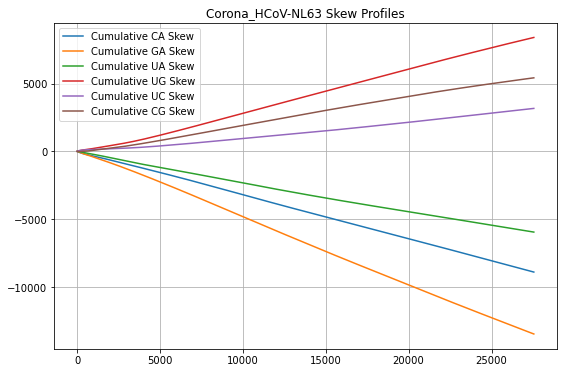

File name  Corona_MN988668.txt
Total bases:  29881
Cumulative ca_skew =  -6452.986992885269
Cumulative ga_skew =  -8028.549456131259
Cumulative ua_skew =  -918.9649018014615
Cumulative ug_skew =  7170.218881989667
Cumulative uc_skew =  5574.671041635826
Cumulative cg_skew =  1676.443829008931
Mean ca_skew =  -0.21595619266039354
Mean ga_skew =  -0.26868409544965677
Mean ua_skew =  -0.03075415487438365
Mean ug_skew =  0.23995913396438212
Mean uc_skew =  0.18656239890351334
Mean cg_skew =  0.056104006860845684


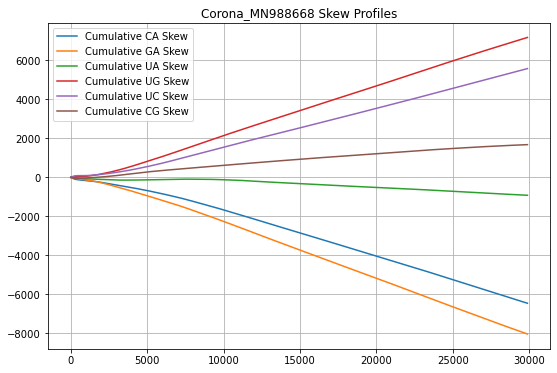

File name  Corona_MT755827.txt
Total bases:  29903
Cumulative ca_skew =  -6476.326153709898
Cumulative ga_skew =  -8071.240253142531
Cumulative ua_skew =  -928.1328321853711
Cumulative ug_skew =  7203.716478025501
Cumulative uc_skew =  5588.476313332932
Cumulative cg_skew =  1697.3942333034445
Mean ca_skew =  -0.21657780669865542
Mean ga_skew =  -0.26991406391139783
Mean ua_skew =  -0.03103811765325796
Mean ug_skew =  0.24090280165954953
Mean uc_skew =  0.18688681113376557
Mean cg_skew =  0.05676334258447132


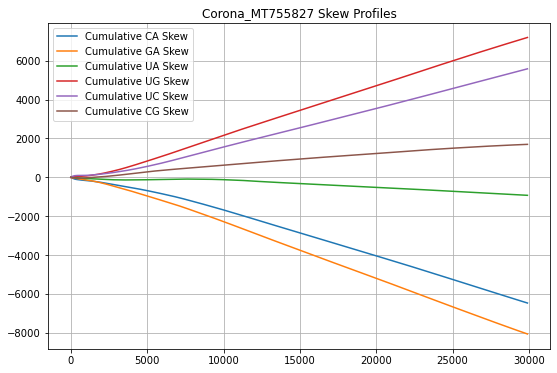

File name  Corona_MT759582.txt
Total bases:  29800
Cumulative ca_skew =  -6392.581469444255
Cumulative ga_skew =  -8084.6917325491895
Cumulative ua_skew =  -1013.3648808094796
Cumulative ug_skew =  7133.517797651847
Cumulative uc_skew =  5420.498823519934
Cumulative cg_skew =  1795.3159191729217
Mean ca_skew =  -0.21451615669275617
Mean ga_skew =  -0.2712983802868852
Mean ua_skew =  -0.03400553291306994
Mean ug_skew =  0.23937979186751282
Mean uc_skew =  0.18189593367516943
Mean cg_skew =  0.060245500643386324


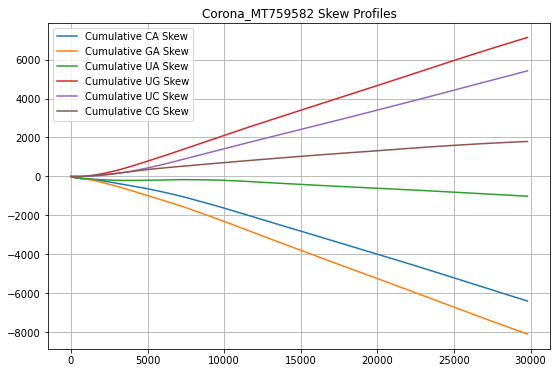

File name  Corona_MT766907.txt
Total bases:  29782
Cumulative ca_skew =  -6347.7123881152465
Cumulative ga_skew =  -8089.150463994582
Cumulative ua_skew =  -943.6007358117135
Cumulative ug_skew =  7206.928109734744
Cumulative uc_skew =  5444.580918911145
Cumulative cg_skew =  1846.753573392764
Mean ca_skew =  -0.21313922463619678
Mean ga_skew =  -0.27161206312519537
Mean ua_skew =  -0.031683591961980756
Mean ug_skew =  0.24198939324876265
Mean uc_skew =  0.18281448253680838
Mean cg_skew =  0.062009051554386754


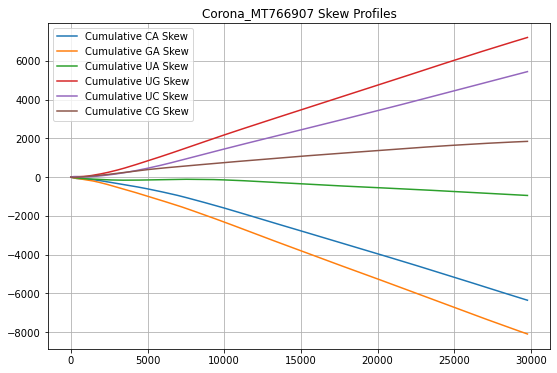

File name  Corona_NC045512.txt
Total bases:  29903
Cumulative ca_skew =  -6458.055958402516
Cumulative ga_skew =  -8034.2595184406855
Cumulative ua_skew =  -902.0600267808431
Cumulative ug_skew =  7191.155619139685
Cumulative uc_skew =  5595.435713011833
Cumulative cg_skew =  1677.1299584673204
Mean ca_skew =  -0.2159668246798803
Mean ga_skew =  -0.26867737412435605
Mean ua_skew =  -0.030166204955383823
Mean ug_skew =  0.24048274819047463
Mean uc_skew =  0.18711954362478422
Mean cg_skew =  0.056085675633458794


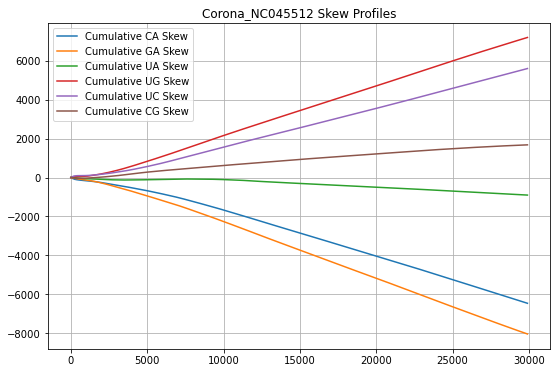

File name  Dengue_MT862858.txt
Total bases:  10152
Cumulative ca_skew =  907.9893712145372
Cumulative ga_skew =  -114.87735281440523
Cumulative ua_skew =  1840.9975970492637
Cumulative ug_skew =  1955.2598527714044
Cumulative uc_skew =  952.2263624942061
Cumulative cg_skew =  1021.5554952127023
Mean ca_skew =  0.089439457369436
Mean ga_skew =  -0.01131573609282965
Mean ua_skew =  0.18134334092290044
Mean ug_skew =  0.1925984882556511
Mean uc_skew =  0.09379692301952323
Mean cg_skew =  0.10062603380739692


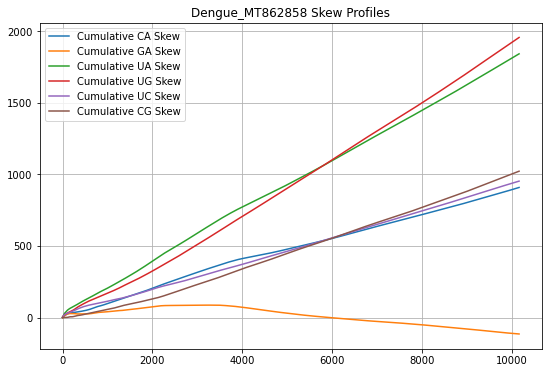

File name  Dengue_MT862893.txt
Total bases:  10161
Cumulative ca_skew =  917.5332896319126
Cumulative ga_skew =  -124.8460865226225
Cumulative ua_skew =  1845.7374407421707
Cumulative ug_skew =  1969.5009793269628
Cumulative uc_skew =  947.5253211351641
Cumulative cg_skew =  1040.920235511437
Mean ca_skew =  0.0902995069020676
Mean ga_skew =  -0.01228679131213684
Mean ua_skew =  0.18164919208170213
Mean ug_skew =  0.19382944388612808
Mean uc_skew =  0.09325118798692694
Mean cg_skew =  0.10244269614323728


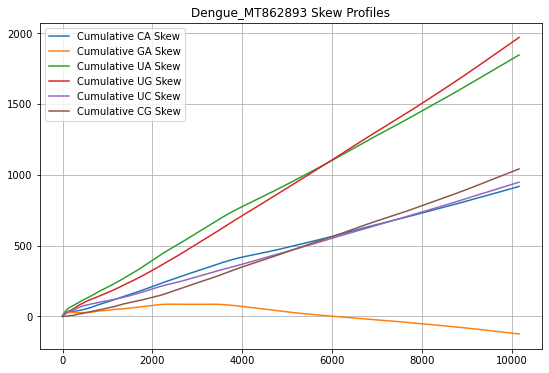

File name  Enterovirus A_NC038306.txt
Total bases:  7398
Cumulative ca_skew =  7.845673900773796
Cumulative ga_skew =  188.95805332638804
Cumulative ua_skew =  270.0570633371832
Cumulative ug_skew =  80.26135297683106
Cumulative uc_skew =  260.78130946302394
Cumulative cg_skew =  -182.10964297076274
Mean ca_skew =  0.0010605128278959027
Mean ga_skew =  0.025541775253634803
Mean ua_skew =  0.03650406371143313
Mean ug_skew =  0.010849060959290469
Mean uc_skew =  0.03525024458813529
Mean cg_skew =  -0.024616064202590576


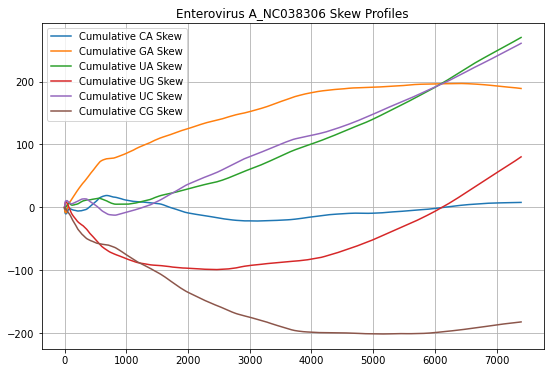

File name  Enterovirus B_NC038307.txt
Total bases:  7399
Cumulative ca_skew =  134.34116518741635
Cumulative ga_skew =  201.24503289920926
Cumulative ua_skew =  596.3002472418675
Cumulative ug_skew =  395.2706331658678
Cumulative uc_skew =  461.4265543667008
Cumulative cg_skew =  -67.3671716972093
Mean ca_skew =  0.018156665115207072
Mean ga_skew =  0.02719895024992676
Mean ua_skew =  0.08059200530367194
Mean ug_skew =  0.053422169639933605
Mean uc_skew =  0.06236336726134607
Mean cg_skew =  -0.009104902243169193


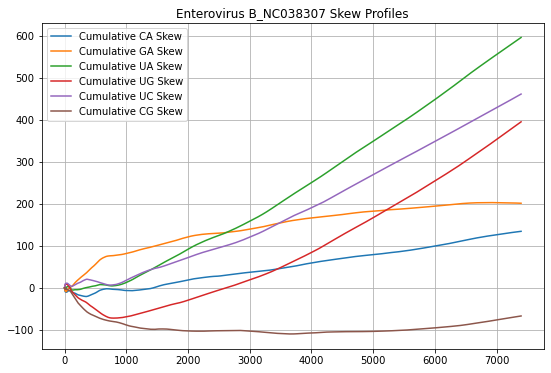

File name  Enterovirus D_NC038308.txt
Total bases:  7367
Cumulative ca_skew =  -842.5335724451511
Cumulative ga_skew =  -747.4815637829166
Cumulative ua_skew =  381.8626540457666
Cumulative ug_skew =  1118.9318662400804
Cumulative uc_skew =  1212.6021431374838
Cumulative cg_skew =  -96.39339337980746
Mean ca_skew =  -0.1143658982550768
Mean ga_skew =  -0.10146349447304313
Mean ua_skew =  0.05183421393318391
Mean ug_skew =  0.15188433096783996
Mean uc_skew =  0.16459917783866992
Mean cg_skew =  -0.013084483966310232


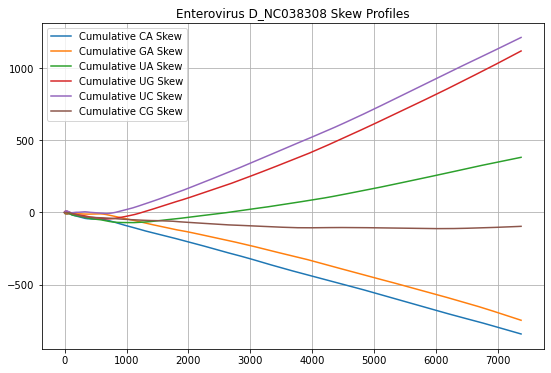

File name  Enterovirus H_NC038309.txt
Total bases:  7295
Cumulative ca_skew =  -255.04149231736585
Cumulative ga_skew =  -298.5256389470133
Cumulative ua_skew =  290.58323947955677
Cumulative ug_skew =  586.039135485633
Cumulative uc_skew =  543.5468609564252
Cumulative cg_skew =  44.600982106425874
Mean ca_skew =  -0.0349611367124558
Mean ga_skew =  -0.0409219518775893
Mean ua_skew =  0.03983320623434631
Mean ug_skew =  0.08033435716047062
Mean uc_skew =  0.07450950801321822
Mean cg_skew =  0.0061139111866245896


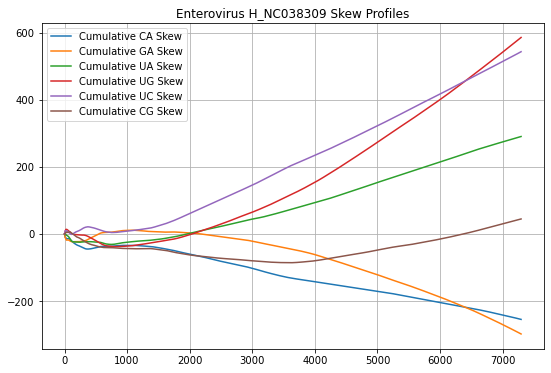

File name  HIV_NC001802.txt
Total bases:  9181
Cumulative ca_skew =  662.9182794959356
Cumulative ga_skew =  -648.0557717276749
Cumulative ua_skew =  2278.8249662246476
Cumulative ug_skew =  2865.1661208662103
Cumulative uc_skew =  1644.050209988045
Cumulative cg_skew =  1306.641650799053
Mean ca_skew =  0.07220545468858933
Mean ga_skew =  -0.07058662147126404
Mean ua_skew =  0.24821097551733368
Mean ug_skew =  0.3120756040590608
Mean uc_skew =  0.1790709301805944
Mean cg_skew =  0.14232018851966532


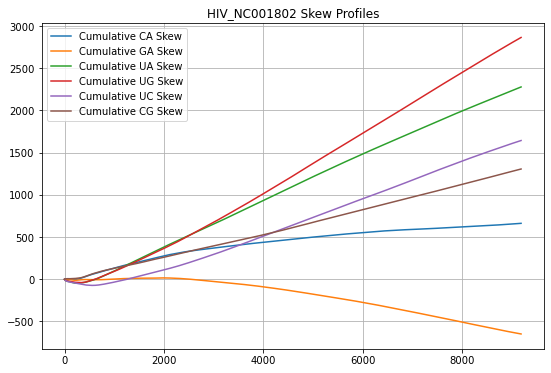

File name  SARS_BJ01.txt
Total bases:  29725
Cumulative ca_skew =  -4673.657317214697
Cumulative ga_skew =  -5852.783862411648
Cumulative ua_skew =  -1008.2914871256656
Cumulative ug_skew =  4887.026196079182
Cumulative uc_skew =  3697.071729432455
Cumulative cg_skew =  1216.4743607485163
Mean ca_skew =  -0.1572298508734968
Mean ga_skew =  -0.19689769091376333
Mean ua_skew =  -0.03392065558034225
Mean ug_skew =  0.16440794604135084
Mean uc_skew =  0.12437583614575097
Mean cg_skew =  0.04092428463409649


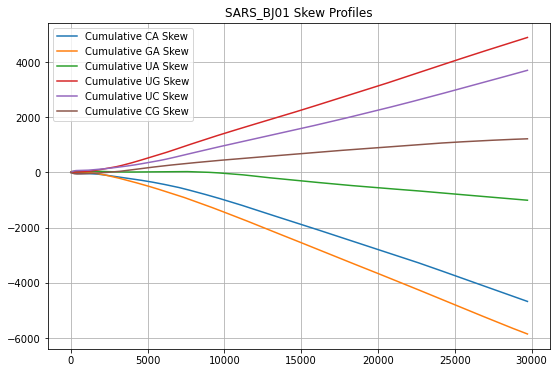

File name  SARS_BJ02.txt
Total bases:  29745
Cumulative ca_skew =  -4795.837669965302
Cumulative ga_skew =  -5961.797443006961
Cumulative ua_skew =  -1080.737767834884
Cumulative ug_skew =  4924.53296458327
Cumulative uc_skew =  3742.7391082062854
Cumulative cg_skew =  1209.3449659877856
Mean ca_skew =  -0.1612317253308253
Mean ga_skew =  -0.20043023846047872
Mean ua_skew =  -0.03633342638543924
Mean ug_skew =  0.16555834474981276
Mean uc_skew =  0.12582750405803592
Mean cg_skew =  0.04065708408094694


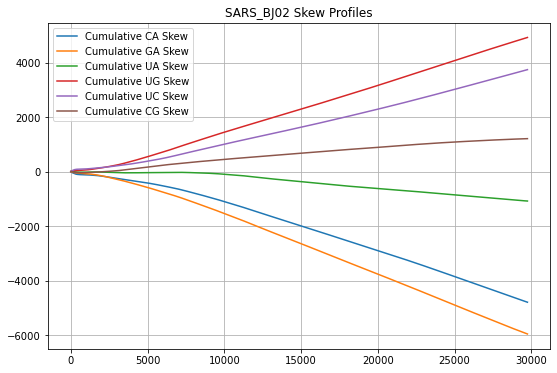

File name  SARS_BJ03.txt
Total bases:  29740
Cumulative ca_skew =  -4758.619592132953
Cumulative ga_skew =  -5908.156354700722
Cumulative ua_skew =  -1096.238086603948
Cumulative ug_skew =  4856.452578857809
Cumulative uc_skew =  3689.250848698187
Cumulative cg_skew =  1190.5149650599687
Mean ca_skew =  -0.16000738373009502
Mean ga_skew =  -0.19866026747480783
Mean ua_skew =  -0.03686072920658845
Mean ug_skew =  0.16329699323664434
Mean uc_skew =  0.12405012941150526
Mean cg_skew =  0.04003076546939953


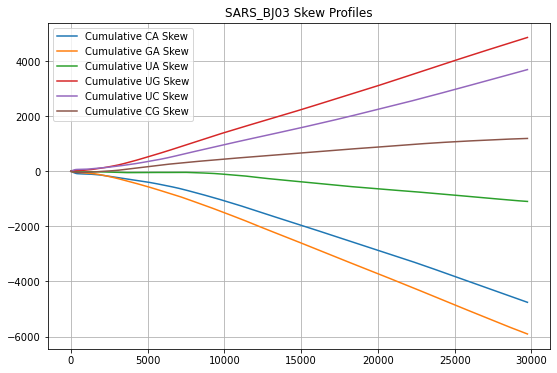

File name  SARS_BJ04.txt
Total bases:  29732
Cumulative ca_skew =  -4711.669353616731
Cumulative ga_skew =  -5868.524487029528
Cumulative ua_skew =  -1017.4620116896534
Cumulative ug_skew =  4892.611386460481
Cumulative uc_skew =  3722.196855748389
Cumulative cg_skew =  1197.493299857036
Mean ca_skew =  -0.1584713222661338
Mean ga_skew =  -0.19738075094273988
Mean ua_skew =  -0.03422110896305895
Mean ug_skew =  0.16455708954864914
Mean uc_skew =  0.12519160687973865
Mean cg_skew =  0.04027624444561503


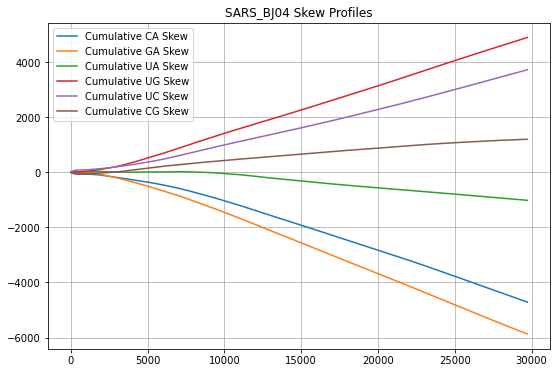

File name  West Nile_NC009942.txt
Total bases:  11029
Cumulative ca_skew =  1324.5408576913292
Cumulative ga_skew =  -57.230114777079486
Cumulative ua_skew =  1054.2015928002513
Cumulative ug_skew =  1111.125301135032
Cumulative uc_skew =  -273.42268201155736
Cumulative cg_skew =  1382.0342904397517
Mean ca_skew =  0.12009618802169923
Mean ga_skew =  -0.005189057464600588
Mean ua_skew =  0.09558451290237127
Mean ug_skew =  0.10074578847901308
Mean uc_skew =  -0.02479124870899979
Mean cg_skew =  0.12530912054037044


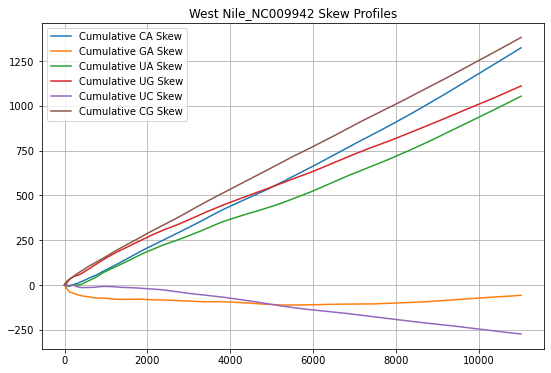

File name  Zika_AY632535.txt
Total bases:  10794
Cumulative ca_skew =  1381.19182085144
Cumulative ga_skew =  -283.888152331984
Cumulative ua_skew =  1147.271847336946
Cumulative ug_skew =  1432.180908931633
Cumulative uc_skew =  -237.84898979636552
Cumulative cg_skew =  1663.3477427061875
Mean ca_skew =  0.12795922001588345
Mean ga_skew =  -0.02630055144821103
Mean ua_skew =  0.10628792359986575
Mean ug_skew =  0.1326830562286112
Mean uc_skew =  -0.02203529644213135
Mean cg_skew =  0.1540992905971998


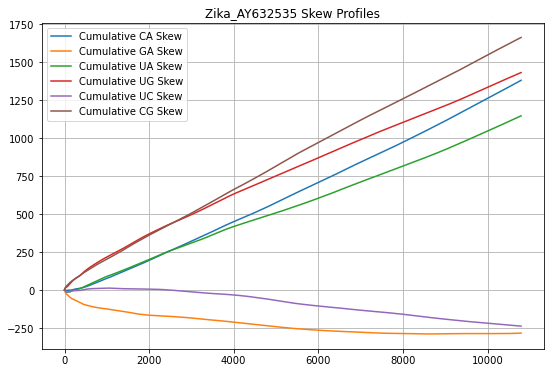

File name  Zika_MN101548.txt
Total bases:  10738
Cumulative ca_skew =  1352.1148887031936
Cumulative ga_skew =  -295.92443703296664
Cumulative ua_skew =  1152.4268934177044
Cumulative ug_skew =  1444.8624688989821
Cumulative uc_skew =  -202.8895276811698
Cumulative cg_skew =  1644.5914963765763
Mean ca_skew =  0.12591868957936217
Mean ga_skew =  -0.0275586177158652
Mean ua_skew =  0.10732230335422818
Mean ug_skew =  0.13455601312152898
Mean uc_skew =  -0.01889453601053915
Mean cg_skew =  0.15315622056030556


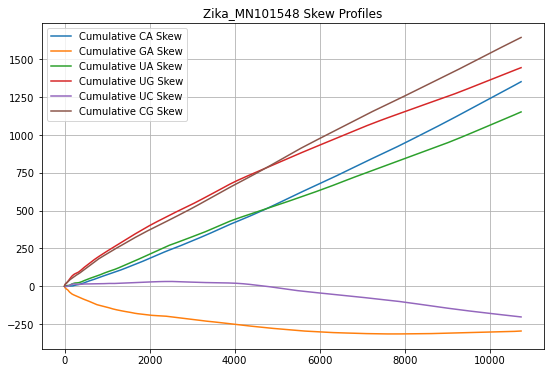

In [4]:
mat = np.array([])                # Valores de sesgo acumulativos
mat2 = np.array([])               # Valores de sesgo medio
virus_names = list()

for file in os.listdir(data_path):
    input_file_path = data_path + '/' + file
    counter = 0; A_count = 0; C_count = 0; G_count = 0; U_count = 0
    ca_skew = []; ga_skew = []; ua_skew = []; uc_skew = []; ug_skew = []; cg_skew = []  
    
    temp_DNA = ''           # Template DNA
    with open(input_file_path,'r') as input_data:
        header = input_data.readline().strip()
        for line in input_data:
            temp_DNA = line.strip()
            for base in temp_DNA:
                counter += 1
                if base == "A":
                    U_count +=1                  
                elif base == "C":
                    G_count +=1
                elif base == "G":
                    C_count +=1
                elif base == "T":
                    A_count +=1        

                ca_skew.insert(counter, bases_skew(C_count, A_count))
                ga_skew.insert(counter, bases_skew(G_count, A_count))
                ua_skew.insert(counter, bases_skew(U_count, A_count))
                ug_skew.insert(counter, bases_skew(U_count, G_count))
                uc_skew.insert(counter, bases_skew(U_count, C_count))
                cg_skew.insert(counter, bases_skew(C_count, G_count))            

        print('File name ', file)
        print('Total bases: ', counter)
        print('Cumulative ca_skew = ', np.cumsum(ca_skew)[len(ca_skew)-1])
        print('Cumulative ga_skew = ',np.cumsum(ga_skew)[len(ga_skew)-1])
        print('Cumulative ua_skew = ',np.cumsum(ua_skew)[len(ua_skew)-1])
        print('Cumulative ug_skew = ',np.cumsum(ug_skew)[len(ug_skew)-1])
        print('Cumulative uc_skew = ',np.cumsum(uc_skew)[len(uc_skew)-1])
        print('Cumulative cg_skew = ',np.cumsum(cg_skew)[len(cg_skew)-1])
        print('==============================================')
        print('Mean ca_skew = ', statistics.mean(ca_skew))
        print('Mean ga_skew = ', statistics.mean(ga_skew))
        print('Mean ua_skew = ', statistics.mean(ua_skew))
        print('Mean ug_skew = ', statistics.mean(ug_skew))
        print('Mean uc_skew = ', statistics.mean(uc_skew))
        print('Mean cg_skew = ', statistics.mean(cg_skew))
        
        # Nombre del virus del nombre del archivo
        virus_Name = os.path.split(input_file_path)[1].split(".")[0]
        
        # Nombre del virus en la lista de nombre de virus
        virus_names.append(virus_Name)
        c = 10
        if mat.shape == (0,):
            
            mat = np.hstack((mat, np.array([np.cumsum(ca_skew)[len(ca_skew)-1],
                                            np.cumsum(ga_skew)[len(ga_skew)-1],
                                            np.cumsum(ua_skew)[len(ua_skew)-1],
                                            np.cumsum(ug_skew)[len(ug_skew)-1],
                                            np.cumsum(uc_skew)[len(uc_skew)-1],
                                            np.cumsum(cg_skew)[len(cg_skew)-1]                                            
                                           ])))
            mat2 = np.hstack((mat2, np.array([(statistics.mean(ca_skew))*c,
                                            (statistics.mean(ga_skew))*c,
                                            (statistics.mean(ua_skew))*c,
                                            (statistics.mean(ug_skew))*c,
                                            (statistics.mean(uc_skew))*c,
                                            (statistics.mean(cg_skew))*c                                            
                                           ])))
        else:
            mat = np.vstack((mat, np.array([np.cumsum(ca_skew)[len(ca_skew)-1],
                                            np.cumsum(ga_skew)[len(ga_skew)-1],
                                            np.cumsum(ua_skew)[len(ua_skew)-1],
                                            np.cumsum(ug_skew)[len(ug_skew)-1],
                                            np.cumsum(uc_skew)[len(uc_skew)-1],
                                            np.cumsum(cg_skew)[len(cg_skew)-1]                                            
                                           ])))    
            mat2 = np.vstack((mat2, np.array([(statistics.mean(ca_skew))*c,
                                            (statistics.mean(ga_skew))*c,
                                            (statistics.mean(ua_skew))*c,
                                            (statistics.mean(ug_skew))*c,
                                            (statistics.mean(uc_skew))*c,
                                            (statistics.mean(cg_skew))*c                                            
                                           ])))    
        
        plt.figure(figsize=(9,6))
        plt.plot(np.cumsum(ca_skew), label="Cumulative CA Skew") 
        plt.plot(np.cumsum(ga_skew), label="Cumulative GA Skew") 
        plt.plot(np.cumsum(ua_skew), label="Cumulative UA Skew") 
        plt.plot(np.cumsum(ug_skew), label="Cumulative UG Skew") 
        plt.plot(np.cumsum(uc_skew), label="Cumulative UC Skew") 
        plt.plot(np.cumsum(cg_skew), label="Cumulative CG Skew")      
        plt.title(virus_Name + " Skew Profiles")
        plt.legend()
        plt.grid()
        
        plt.show()    
        plt.close()
        input_data.close()

In [5]:
linkage(mat2)[0,]

array([1.       , 5.       , 0.0096476, 2.       ])

### Tarea 3: Análsis del dataset

In [6]:
print(len(virus_names))
virus_names[:]

20


['Corona_HCoV-NL63',
 'Corona_MN988668',
 'Corona_MT755827',
 'Corona_MT759582',
 'Corona_MT766907',
 'Corona_NC045512',
 'Dengue_MT862858',
 'Dengue_MT862893',
 'Enterovirus A_NC038306',
 'Enterovirus B_NC038307',
 'Enterovirus D_NC038308',
 'Enterovirus H_NC038309',
 'HIV_NC001802',
 'SARS_BJ01',
 'SARS_BJ02',
 'SARS_BJ03',
 'SARS_BJ04',
 'West Nile_NC009942',
 'Zika_AY632535',
 'Zika_MN101548']

In [7]:
print('mat shape = ', mat.shape)
print('mat2 shape = ', mat2.shape)

mat shape =  (20, 6)
mat2 shape =  (20, 6)


In [8]:
print(mat[0,0])
print("{:.2f}".format(mat[0,0]))

-8892.718135634901
-8892.72


In [9]:
print(mat[0,])

[ -8892.71813563 -13454.3840888   -5947.28102079   8392.04623687
   3165.31804809   5417.58910545]


In [10]:
np.set_printoptions(linewidth=150)
print('0 ', mat[0,])
print('1 ', mat[1,])
print('2 ', mat[2,])
print('...', '...')
print('...', '...')
print('19 ', mat[19,])

0  [ -8892.71813563 -13454.3840888   -5947.28102079   8392.04623687   3165.31804809   5417.58910545]
1  [-6452.98699289 -8028.54945613  -918.9649018   7170.21888199  5574.67104164  1676.44382901]
2  [-6476.32615371 -8071.24025314  -928.13283219  7203.71647803  5588.47631333  1697.3942333 ]
... ...
... ...
19  [1352.1148887  -295.92443703 1152.42689342 1444.8624689  -202.88952768 1644.59149638]


In [11]:
print('0 ', mat2[0,])
print('1 ', mat2[1,])
print('2 ', mat2[2,])
print('...', '...')
print('...', '...')
print('19 ', mat2[19,])

0  [-3.22749542 -4.88309225 -2.15848765  3.04578312  1.14881067  1.96624292]
1  [-2.15956193 -2.68684095 -0.30754155  2.39959134  1.86562399  0.56104007]
2  [-2.16577807 -2.69914064 -0.31038118  2.40902802  1.86886811  0.56763343]
... ...
... ...
19  [ 1.2591869  -0.27558618  1.07322303  1.34556013 -0.18894536  1.53156221]


In [12]:
print(list(map('{:.1f}'.format, mat[0,])))
print(list(map('{:.1f}'.format, mat[1,])))
print(list(map('{:.1f}'.format, mat[2,])))
print(list(map('{:.1f}'.format, mat[3,])))

['-8892.7', '-13454.4', '-5947.3', '8392.0', '3165.3', '5417.6']
['-6453.0', '-8028.5', '-919.0', '7170.2', '5574.7', '1676.4']
['-6476.3', '-8071.2', '-928.1', '7203.7', '5588.5', '1697.4']
['-6392.6', '-8084.7', '-1013.4', '7133.5', '5420.5', '1795.3']


In [13]:
print(list(map('{:.3f}'.format, [i/10 for i in mat2[0,]])))
print(list(map('{:.3f}'.format, [i/10 for i in mat2[1,]])))
print(list(map('{:.3f}'.format, [i/10 for i in mat2[2,]])))
print('...', '...')
print('...', '...')
print(list(map('{:.3f}'.format, [i/10 for i in mat2[19,]])))

['-0.323', '-0.488', '-0.216', '0.305', '0.115', '0.197']
['-0.216', '-0.269', '-0.031', '0.240', '0.187', '0.056']
['-0.217', '-0.270', '-0.031', '0.241', '0.187', '0.057']
... ...
... ...
['0.126', '-0.028', '0.107', '0.135', '-0.019', '0.153']


In [14]:
df = pd.DataFrame(np.array([
        list(map('{:.2f}'.format, mat[0,])), list(map('{:.2f}'.format, mat[1,])),
        list(map('{:.2f}'.format, mat[2,])), list(map('{:.2f}'.format, mat[3,])),
        list(map('{:.2f}'.format, mat[4,])), list(map('{:.2f}'.format, mat[5,])),
        list(map('{:.2f}'.format, mat[6,])), list(map('{:.2f}'.format, mat[7,])),
        list(map('{:.2f}'.format, mat[8,])), list(map('{:.2f}'.format, mat[9,])),
        list(map('{:.2f}'.format, mat[10,])), list(map('{:.2f}'.format, mat[11,])),
        list(map('{:.2f}'.format, mat[12,])), list(map('{:.2f}'.format, mat[13,])),
        list(map('{:.2f}'.format, mat[14,])), list(map('{:.2f}'.format, mat[15,])),
        list(map('{:.2f}'.format, mat[16,])), list(map('{:.2f}'.format, mat[17,])),
        list(map('{:.2f}'.format, mat[18,])), list(map('{:.2f}'.format, mat[19,]))      
        ]),
        columns=['ca_skew', 'ga_skew', 'ua_skew','ug_skew', 'uc_skew', 'cg_skew'],
        index=virus_names[:])
df

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Corona_HCoV-NL63,-8892.72,-13454.38,-5947.28,8392.05,3165.32,5417.59
Corona_MN988668,-6452.99,-8028.55,-918.96,7170.22,5574.67,1676.44
Corona_MT755827,-6476.33,-8071.24,-928.13,7203.72,5588.48,1697.39
Corona_MT759582,-6392.58,-8084.69,-1013.36,7133.52,5420.50,1795.32
Corona_MT766907,-6347.71,-8089.15,-943.60,7206.93,5444.58,1846.75
Corona_NC045512,-6458.06,-8034.26,-902.06,7191.16,5595.44,1677.13
Dengue_MT862858,907.99,-114.88,1841.00,1955.26,952.23,1021.56
Dengue_MT862893,917.53,-124.85,1845.74,1969.50,947.53,1040.92
Enterovirus A_NC038306,7.85,188.96,270.06,80.26,260.78,-182.11
Enterovirus B_NC038307,134.34,201.25,596.30,395.27,461.43,-67.37


In [15]:
df2 = pd.DataFrame(np.array([
        list(map('{:.2f}'.format, [i/10 for i in mat2[0,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[1,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[2,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[3,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[4,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[5,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[6,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[7,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[8,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[9,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[10,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[11,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[12,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[13,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[14,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[15,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[16,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[17,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[18,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[19,]]))    
        ]),
        columns=['ca_skew', 'ga_skew', 'ua_skew','ug_skew', 'uc_skew', 'cg_skew'],
        index=virus_names[:])
df2

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Corona_HCoV-NL63,-0.32,-0.49,-0.22,0.30,0.11,0.20
Corona_MN988668,-0.22,-0.27,-0.03,0.24,0.19,0.06
Corona_MT755827,-0.22,-0.27,-0.03,0.24,0.19,0.06
Corona_MT759582,-0.21,-0.27,-0.03,0.24,0.18,0.06
Corona_MT766907,-0.21,-0.27,-0.03,0.24,0.18,0.06
Corona_NC045512,-0.22,-0.27,-0.03,0.24,0.19,0.06
Dengue_MT862858,0.09,-0.01,0.18,0.19,0.09,0.10
Dengue_MT862893,0.09,-0.01,0.18,0.19,0.09,0.10
Enterovirus A_NC038306,0.00,0.03,0.04,0.01,0.04,-0.02
Enterovirus B_NC038307,0.02,0.03,0.08,0.05,0.06,-0.01


### Tarea 4: Clustering Jerárquico

> Wikipedia
>> En [coordenadas cartesianas](https://en.wikipedia.org/wiki/Cartesian_coordinate_system) si $p = (p_1, p_2,\cdots, p_n)$ y $q = (q_1, q_2,\cdots, q_n)$, si dos puntos están a una  [Euclidean n-space](https://en.wikipedia.org/wiki/Euclidean_space), se tiene que **Euclidean distance** (d) de **p** a **q**, o de **q** a **p**, esta dada por [Pythagorean formula](https://en.wikipedia.org/wiki/Pythagorean_theorem):  
>>$d(p, q) = d(q, p)= \sqrt{\sum_{i=1}^n (q_i - p_i)^2}$  
>>$=\sqrt{(q_1-p_1)^2+(q_2-p_2)^2+\cdots+(q_n-p_n)^2}$  
  
  
$d(Zika AY632535, Zika MN101548)=
\sqrt{(1381.19-1352.11)^2+(-283.89-(-295.92))^2+(1147.27-1152.43)^2+
(1432.18-1444.86)^2+(-237.85-(-202.89))^2+(1663.35-1644.59)^2}\approx52.46$




>```python
import math  
dist = 0  
for p, q in zip(mat[18,], mat[19,]):        
    dist += math.pow((p-q), 2)  
dist = math.sqrt(dist)
print(dist)  
> 52.45662363913553  
>```
  
```python
from scipy.cluster.hierarchy import linkage
linkage(mat)
```

In [16]:
linkage_matrix = linkage(mat, 
                         method='single', 
                         metric='euclidean', 
                         optimal_ordering=False)
print(linkage_matrix.shape)
print(linkage_matrix[0:3])
print('...', '...')
print(linkage_matrix[18])

(19, 4)
[[ 6.          7.         28.5101875   2.        ]
 [ 1.          5.         34.84341166  2.        ]
 [18.         19.         52.45662364  2.        ]]
... ...
[   0.           37.         8900.47217989   20.        ]


In [17]:
y = 0
for x in range(len(linkage_matrix)):
    y+=1
    print(len(linkage_matrix)+y, linkage_matrix[x])

20 [ 6.         7.        28.5101875  2.       ]
21 [ 1.          5.         34.84341166  2.        ]
22 [18.         19.         52.45662364  2.        ]
23 [13.         16.         52.91056314  2.        ]
24 [ 2.        21.        54.7541342  3.       ]
25 [ 14.          15.         111.14546016   2.        ]
26 [ 23.          25.         111.45526329   4.        ]
27 [  3.           4.         124.55923965   2.        ]
28 [ 24.          27.         234.43283633   5.        ]
29 [ 17.          22.         496.71392088   3.        ]
30 [  8.           9.         524.63500631   2.        ]
31 [ 11.          30.         741.97419156   3.        ]
32 [  10.           31.         1143.03514609    4.        ]
33 [  12.           20.         1372.62989182    3.        ]
34 [  29.           33.         1631.54140784    6.        ]
35 [  32.           34.         2201.42550557   10.        ]
36 [  26.           28.         3885.69989123    9.        ]
37 [  35.          36.        8047.9124

In [18]:
df.iloc[[2, 1,5], :]

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Corona_MT755827,-6476.33,-8071.24,-928.13,7203.72,5588.48,1697.39
Corona_MN988668,-6452.99,-8028.55,-918.96,7170.22,5574.67,1676.44
Corona_NC045512,-6458.06,-8034.26,-902.06,7191.16,5595.44,1677.13


### Tarea 5: Clustering Jerárquico - Ordenamiento y Métodos

### Orden Óptimo

> **Higgs and Attwood (2005)**:
>>*It is often said that trees (the phylogenetics trees) are like hanging mobiles. You can imagine suspending them from the root and allowing the horizontal lines to swing around.*  


<table><tr><td><img src='images/p_tree_1.png'></td><td><img src='images/p_tree_2.png'></td></tr></table>  

Dendrogram (a) |  | Dendrogram (b) |
---- | |:-------- |  
**Vertical lines show the distances** |  | **Vertical lines show the distances** |


**Paul G. Higgs and Teresa K. Attwood** (2005). Bioinformattics and Molecular Evolution. Willey-Blackwell. Print ISBN:9781405106832 |Online ISBN:9781118697078 |[DOI:10.1002/9781118697078](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118697078)


In [19]:
linkage_matrix = linkage(mat, 
                         method='single', 
                         metric='euclidean', 
                         optimal_ordering=True)
print(linkage_matrix.shape)
for x in range(len(linkage_matrix)):
    print(linkage_matrix[x])

(19, 4)
[ 6.         7.        28.5101875  2.       ]
[ 5.          1.         34.84341166  2.        ]
[18.         19.         52.45662364  2.        ]
[16.         13.         52.91056314  2.        ]
[ 2.        21.        54.7541342  3.       ]
[ 14.          15.         111.14546016   2.        ]
[ 25.          23.         111.45526329   4.        ]
[  3.           4.         124.55923965   2.        ]
[ 24.          27.         234.43283633   5.        ]
[ 17.          22.         496.71392088   3.        ]
[  9.           8.         524.63500631   2.        ]
[ 11.          30.         741.97419156   3.        ]
[  10.           31.         1143.03514609    4.        ]
[  20.           12.         1372.62989182    3.        ]
[  29.           33.         1631.54140784    6.        ]
[  32.           34.         2201.42550557   10.        ]
[  28.           26.         3885.69989123    9.        ]
[  36.          35.        8047.9124615   19.       ]
[   0.           37.        

### Métodos de Clustering 

```Python
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
```

- **single** $^a$  
  - $d(u,v) = min(dist(u[i], v[j])$  
   - [Nearest Point Algorithm](https://en.wikipedia.org/wiki/Nearest_neighbor_search)  
  
- **complete** $^a$  
  - $d(u,v) = max(dist(u[i], v[j])$  
   - [Complete-linkage clustering](https://en.wikipedia.org/wiki/Complete-linkage_clustering) known also as Farthest Point Algorithm or Voor Hees Algorithm  
  
  **average** $^b$  
   - $d(u,v) = \sum_{ij}\frac{d(u[i], v[j])}{(|u| * |v|)}$  
    - [UPGMA](https://en.wikipedia.org/wiki/UPGMA) **U**nweighted **P**air **G**roup **M**ethod with **A**rithmetic Mean algorithm.   
  
- **weighted** $^c$    
  - $d(u,v) = \frac{dist(s,v) + dist(t,v)}{2}$  
   - [WPGMA](https://en.wikipedia.org/wiki/WPGMA) (**W**eighted **P**air **G**roup **M**ethod with **A**rithmetic Mean)
  
- **centroid** $^d$ 
  - $dist(s,t) = ||c_s - c_t||2$ 
   - [UPGMC](https://en.wikipedia.org/wiki/Hierarchical_clustering) (**U**nweighted **P**air **G**roup **M**ethod with **C**entroid linkage)
- **median**  
  - $d{(i\cup j),k} = \frac{d_{i,k} + d_{j,k}}{2}$ 
   - [WPGMC]() (**W**eighted **P**air **G**roup **M**ethod with **C**entroid linkage)
- **ward** $^e$  
  - $d(u,v) = \sqrt{\frac{|v| + |s|}{T}d(v,s)^2 + \frac{|v| + |t|}{T}d(v,t)^2 - \frac{|v|}{T}d(s,t)^2}$ 
   - [Ward's minimum variance method](https://en.wikipedia.org/wiki/Ward%27s_method)
   
   
   
$^a)$ $d(u,v)$ Euclidean distanc between $u$ and $v$ clusters.  

$^a)$ $u[i], v[j]$  all points $i$ in cluster $u$ and $j$ in cluster $v$.  

$^b)$ $|u|$ and $|v|$ are the cardinalities of clusters $u$ and $v$ respectiely.

$^c)$ $u, s, v, t$ where cluster $u$ was formed with cluster $s$ and $t$ and $v$ is a remaining cluster in the forest 

$^d)$ $c_s$ and $c_t$ The centroids of clusters $s$ and $t$.
  
$^e)$ $T = |v| + |s| + |t|$  

[Centroid](https://en.wikipedia.org/wiki/Centroid) or geometric center.


| | Arithmetic Mean | Geometric Center |
| :---- | :-------- |:-------- |  
| **Unweighted Pair Group** | average | centroid |
| **Weighted Pair Group**  | weighted | median |


In [20]:
df.iloc[[6,7,18,19], :]

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Dengue_MT862858,907.99,-114.88,1841.00,1955.26,952.23,1021.56
Dengue_MT862893,917.53,-124.85,1845.74,1969.50,947.53,1040.92
Zika_AY632535,1381.19,-283.89,1147.27,1432.18,-237.85,1663.35
Zika_MN101548,1352.11,-295.92,1152.43,1444.86,-202.89,1644.59


[Time Complexity](http://en.wikipedia.org/wiki/Time_complexity) (Big O Notaion)  
- $O(n^2)$
 - single  
 - complete  
 - average  
 - weighted  
 - ward
- $O(n^3)$
 - centroid  
 - median  


### Correlación cofenética

se puede utilizar función [cophenet](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) para calcular el coeficiente cofenético. El [cophenetic correlation](https://en.wikipedia.org/wiki/Cophenetic_correlation) coefficient es una medida de la fidelidad con que un dendrograma conserva las distancias por pares entre los puntos de datos originales sin modelar.

In [21]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(linkage_matrix, pdist(mat, metric='euclidean'))
c

0.9134217812884088

In [22]:
import operator
cophenetic_results = {}
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
for m in methods:    
    linkage_matrix = linkage(mat, method = m, metric='euclidean', optimal_ordering=True)
    #for x in range(len(linkage_matrix)):
    #    print(linkage_matrix[x])
    c, coph_dists = cophenet(linkage_matrix, pdist(mat))
    cophenetic_results[m] = c
    #print(c)
    #print('======================================================')
print(max(cophenetic_results.items(), key=operator.itemgetter(1))[0])
print(cophenetic_results)

single
{'single': 0.9134217812884088, 'complete': 0.9019088064307287, 'average': 0.9107636361802532, 'weighted': 0.9077800575926043, 'centroid': 0.9106318070979335, 'median': 0.907864065075456, 'ward': 0.8872728478312205}


### Tarea 6: Dendrograma

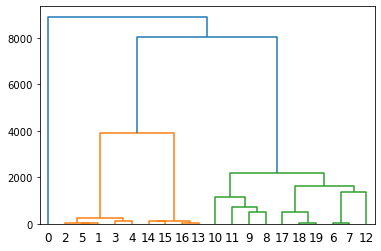

In [23]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=True)
dendrogram(linkage_matrix)
plt.show()
plt.close()

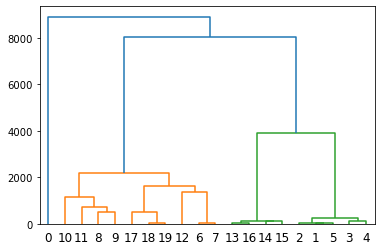

In [24]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=False)
dendrogram(linkage_matrix)
plt.show()
plt.close()

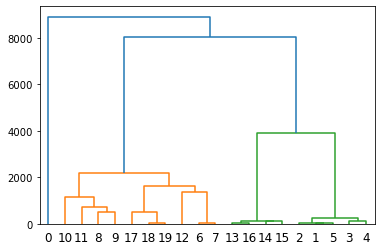

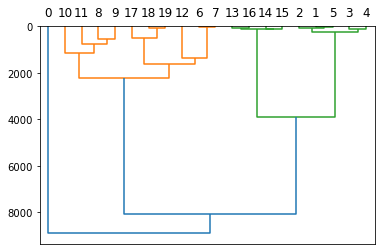

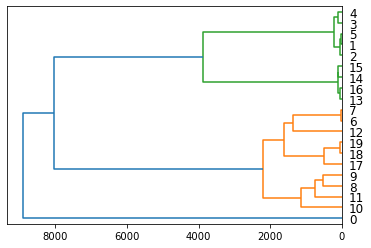

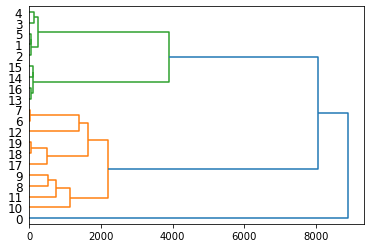

In [25]:
orientations = ('top', 'bottom', 'left', 'right')
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=False)
for orien in orientations:
    dendrogram(linkage_matrix, orientation = orien)
    plt.show()
    plt.close()

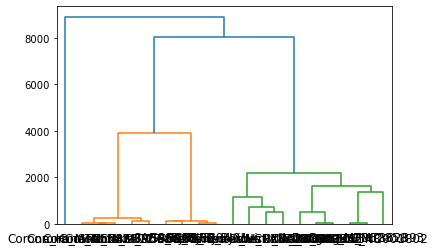

In [26]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=True)
dendrogram(linkage_matrix, labels=virus_names[:])
plt.show()
plt.close()

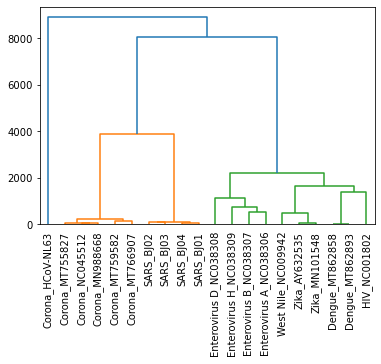

In [27]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=True)
dendrogram(linkage_matrix, labels=virus_names[:], leaf_rotation=90, leaf_font_size=10)
plt.show()
plt.close()

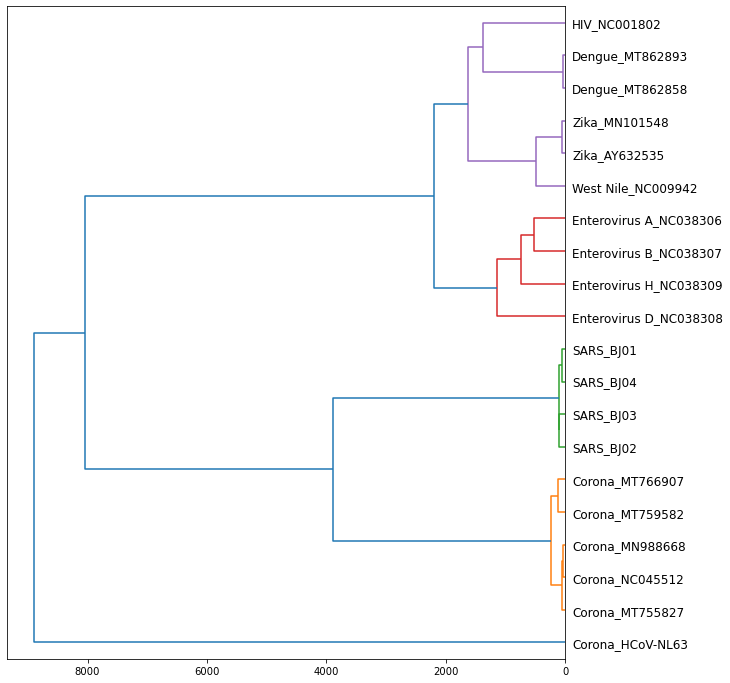

In [28]:
plt.figure(figsize=(10, 12))
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
plt.show()    
plt.close()

In [29]:
0.7*max(linkage_matrix[:,2])

6230.330525922286

In [30]:
linkage_matrix[:,2]

array([  28.5101875 ,   34.84341166,   52.45662364,   52.91056314,   54.7541342 ,  111.14546016,  111.45526329,  124.55923965,  234.43283633,
        496.71392088,  524.63500631,  741.97419156, 1143.03514609, 1372.62989182, 1631.54140784, 2201.42550557, 3885.69989123, 8047.9124615 ,
       8900.47217989])

**Estilo de líneas y opciones de color**  
```python
linestyles = ('solid', 'dashed', 'dashdot', 'dotted')
colors_abbreviation = ('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w')
colors_names = ('blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan')
colors_hexa = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf')
```
*You can read more about matplotlib colors in the [documentation](https://matplotlib.org/api/colors_api.html#matplotlib.colors.Colormap).*

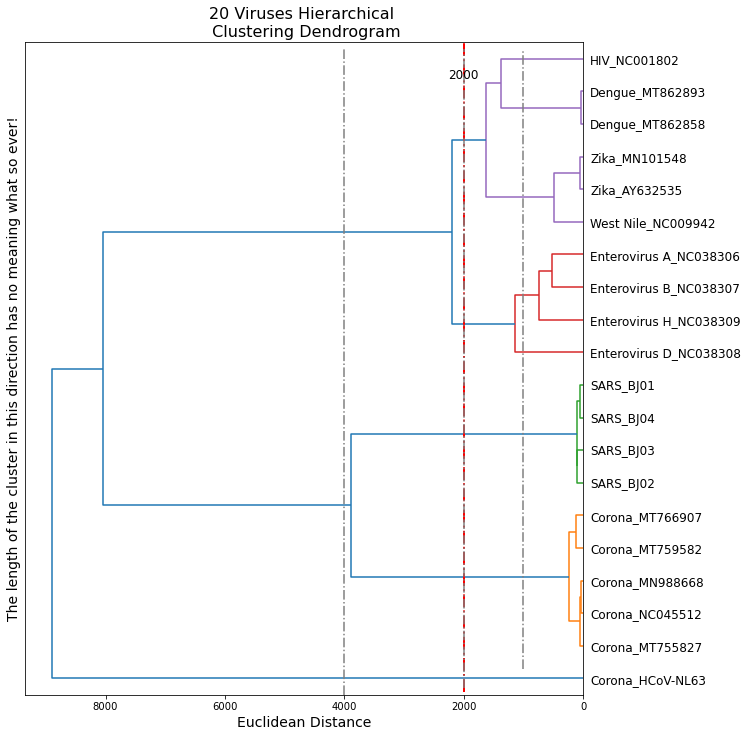

In [31]:
plt.figure(figsize=(10, 12))
plt.title('20 Viruses Hierarchical \n Clustering Dendrogram', fontsize=16)
plt.xlabel('Euclidean Distance', fontsize=14)
plt.ylabel('The length of the cluster in this direction has no meaning what so ever!', fontsize=14)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
plt.vlines(x=2000, ymin=1.0, ymax=200., linestyles='dashdot', color='r', lw=2)
plt.vlines(x=[4000,2000, 1000], ymin=[0, 2, 8], ymax=198., linestyles='dashdot', color='#7f7f7f')
#plt.hlines(y=2000, xmin=1.0, xmax=200., linestyles='dashdot', color='r')
#plt.hlines(y=[4000,2000, 1000], xmin=[0, 2, 8], xmax=198., linestyles='dashdot', label='Multiple Lines', color='#7f7f7f')
plt.text(2000, 190, '2000', size=12, ha='center', va='center')
plt.show()    
plt.close()

### Dendrograma

 - Riboviria  
     - Coronaviridae family,  
      - Corona 
      - SARS  
     - Flaviviridae family,  
        - Dengue 
        - Zika 
        - West Nile  
     - Picornaviridae  
        - Enterovirus  
     - Retroviridae  
        - HIV  
| | Virus Count | Strain Count |
| :---- | :--------: |:--------: |  
| *Coronaviridae* | **2** | **10** |
| *Flaviviridae*  | **3** | **5** |
| *Picornaviridae* | **1** | **5** |
| *Retroviridae*  | **1** | **1** |
|  |
| **Total**  | **7** | **20** |


In [32]:
print(cophenetic_results)

{'single': 0.9134217812884088, 'complete': 0.9019088064307287, 'average': 0.9107636361802532, 'weighted': 0.9077800575926043, 'centroid': 0.9106318070979335, 'median': 0.907864065075456, 'ward': 0.8872728478312205}


In [33]:
print("{:.3f}".format(cophenetic_results['single'] - cophenetic_results['ward']))

0.026


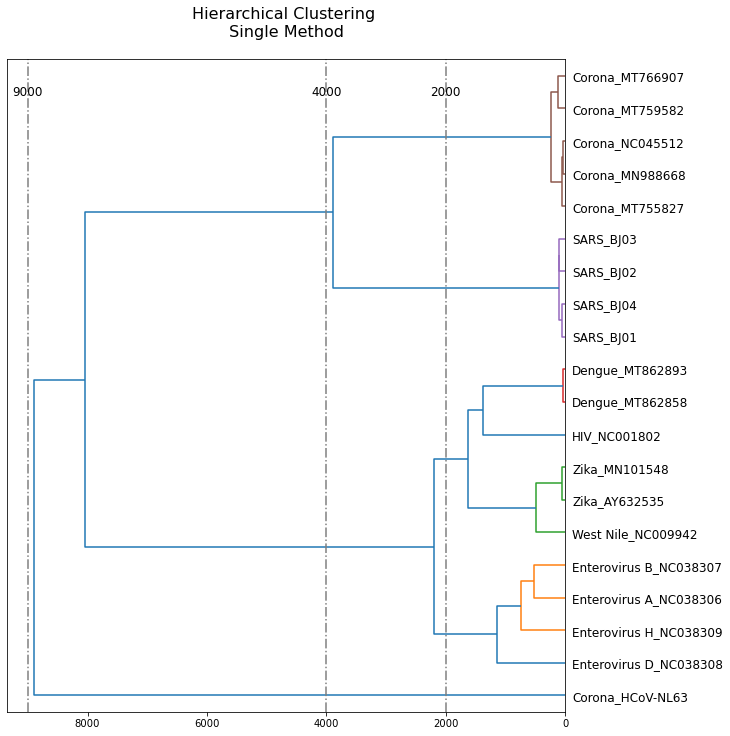

In [34]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.vlines(x=[2000, 4000, 9000], ymin=[0, 0, 0], ymax=200., linestyles='dashdot', color='#7f7f7f')
plt.text(2000, 190, '2000', size=12, ha='center', va='center')
plt.text(4000, 190, '4000', size=12, ha='center', va='center')
plt.text(9000, 190, '9000', size=12, ha='center', va='center')
plt.show()    

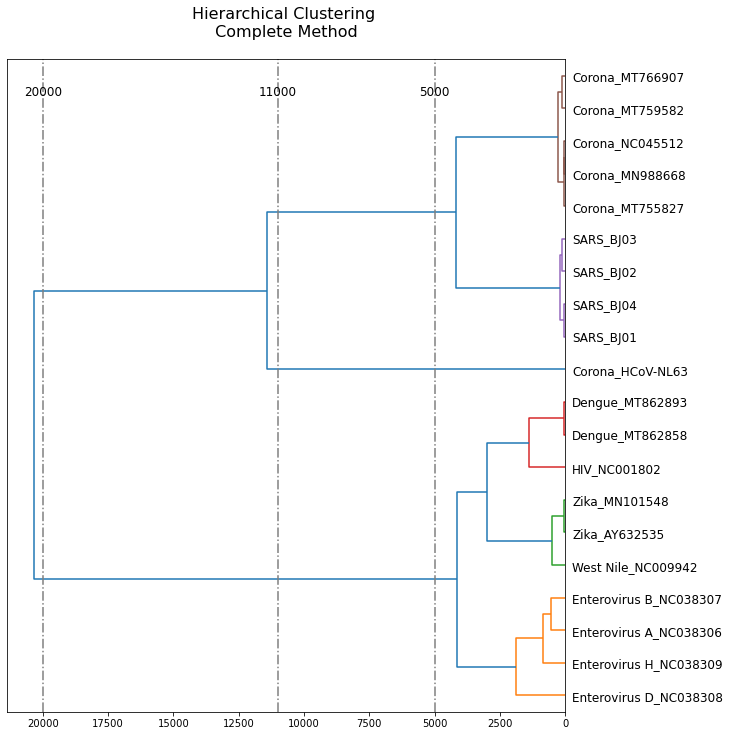

In [35]:
linkage_matrix = linkage(mat, method = 'complete', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Complete Method \n', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.vlines(x=[5000, 11000, 20000], ymin=[0, 0, 0], ymax=200., linestyles='dashdot', color='#7f7f7f')
plt.text(5000, 190, '5000', size=12, ha='center', va='center')
plt.text(11000, 190, '11000', size=12, ha='center', va='center')
plt.text(20000, 190, '20000', size=12, ha='center', va='center')

plt.show()    

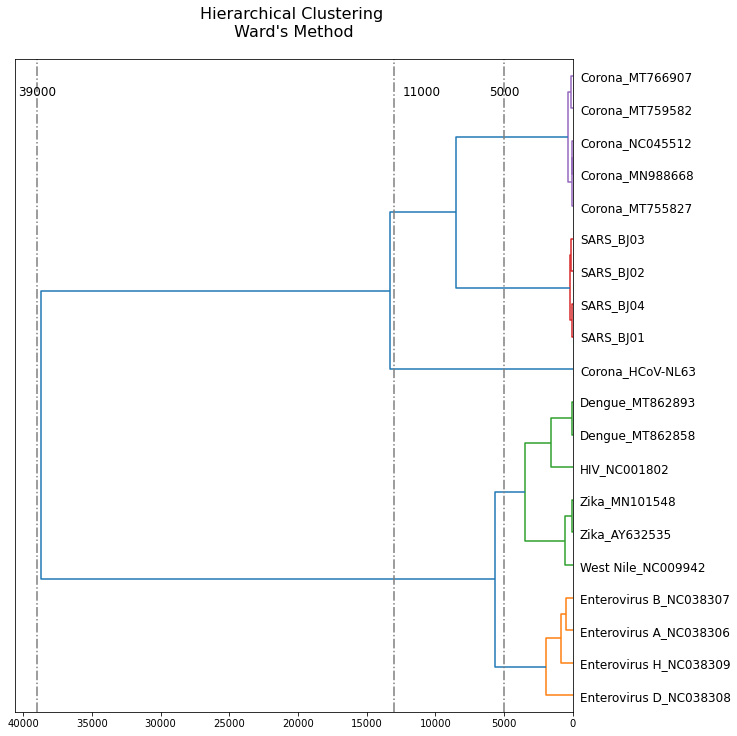

In [36]:
linkage_matrix = linkage(mat, method = 'ward', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Ward\'s Method \n', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.vlines(x=[5000, 13000, 39000], ymin=[0, 0, 0], ymax=200., linestyles='dashdot', color='#7f7f7f')
plt.text(5000, 190, '5000', size=12, ha='center', va='center')
plt.text(11000, 190, '11000', size=12, ha='center', va='center')
plt.text(39000, 190, '39000', size=12, ha='center', va='center')

plt.show()    

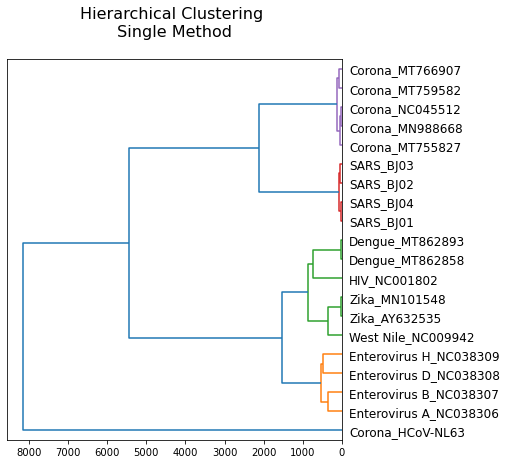

In [37]:
linkage_matrix = linkage(mat[:,[1,2, 5]], method = 'single', metric='euclidean', optimal_ordering=False)
#plt.figure(figsize=(10, 12))
plt.figure(figsize=(6, 7))
plt.title('Hierarchical Clustering \n Single Method \n ', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.show()    

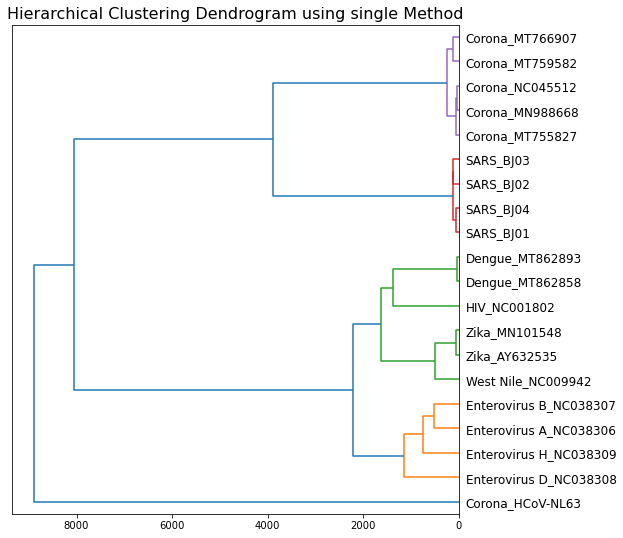

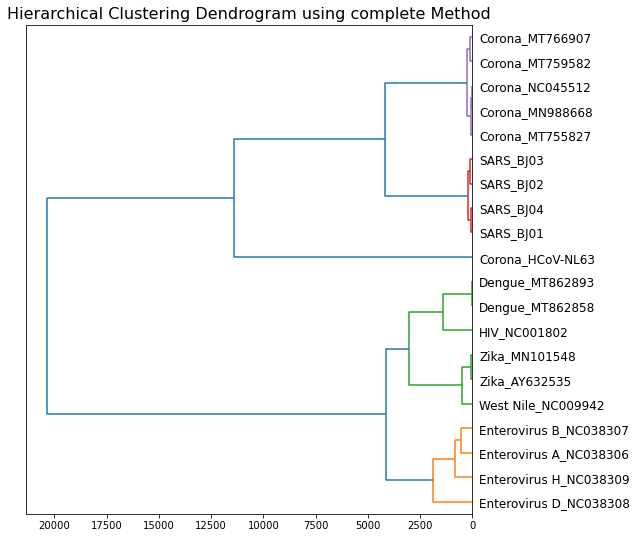

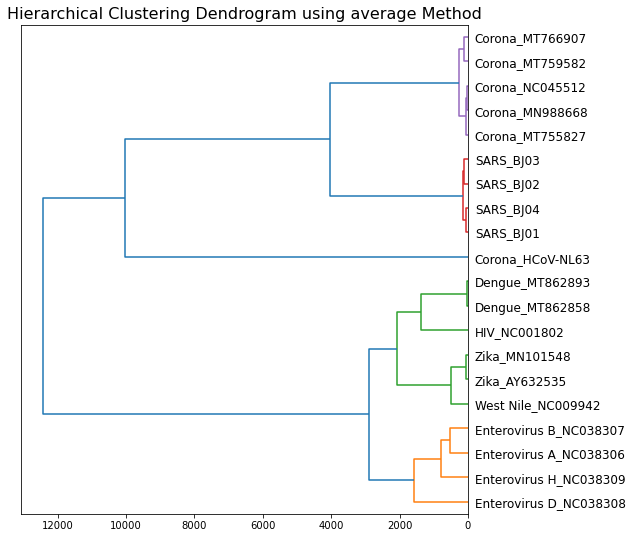

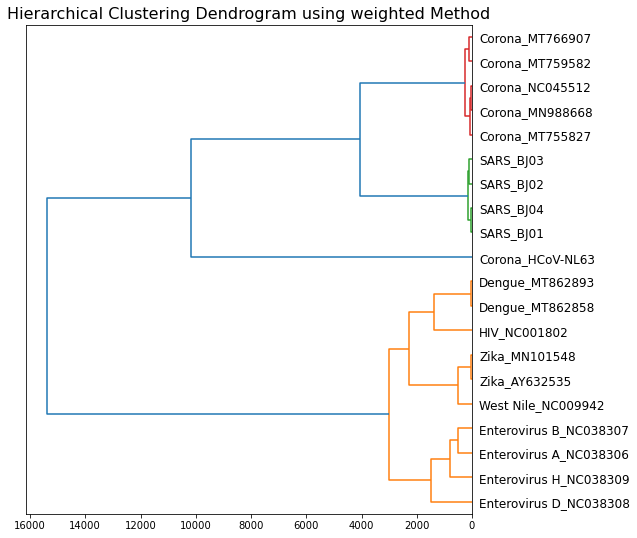

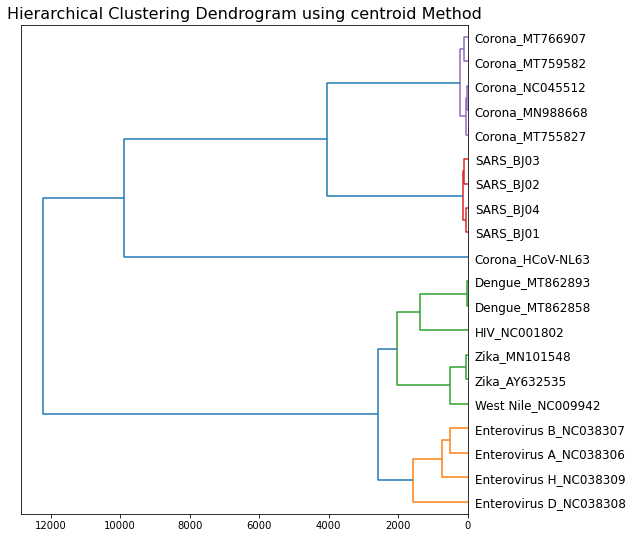

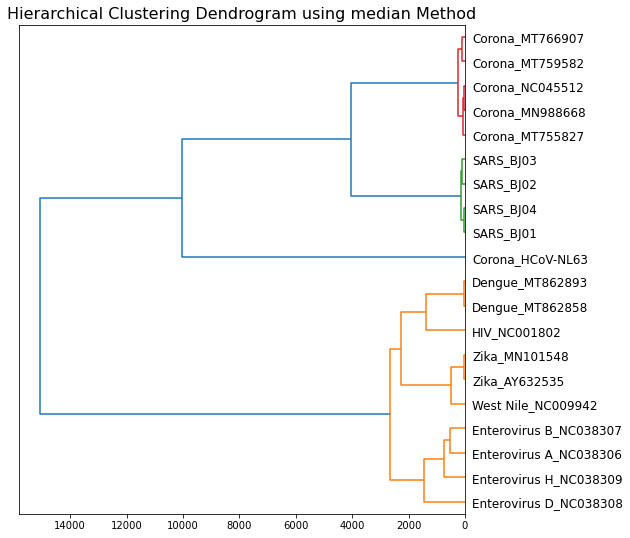

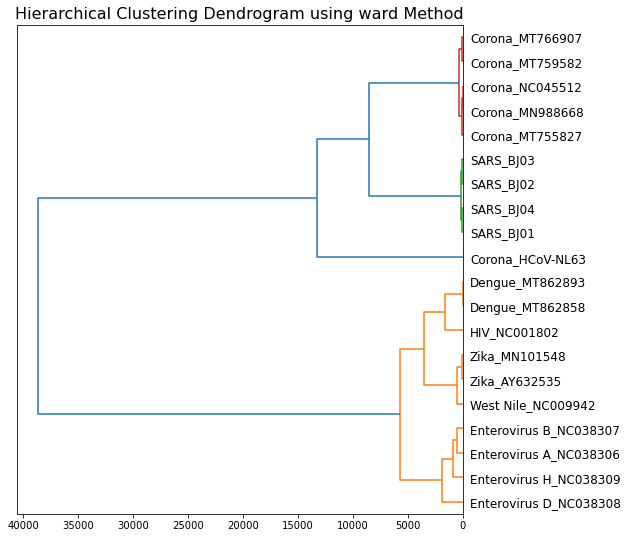

In [38]:
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
for m in methods:    
    linkage_matrix = linkage(mat, method = m, metric='euclidean', optimal_ordering=False)
    y = 0
    plt.figure(figsize=(8, 9))
    plt.title('Hierarchical Clustering Dendrogram using ' + str(m) + ' Method', fontsize=16)
    dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
    plt.show()   

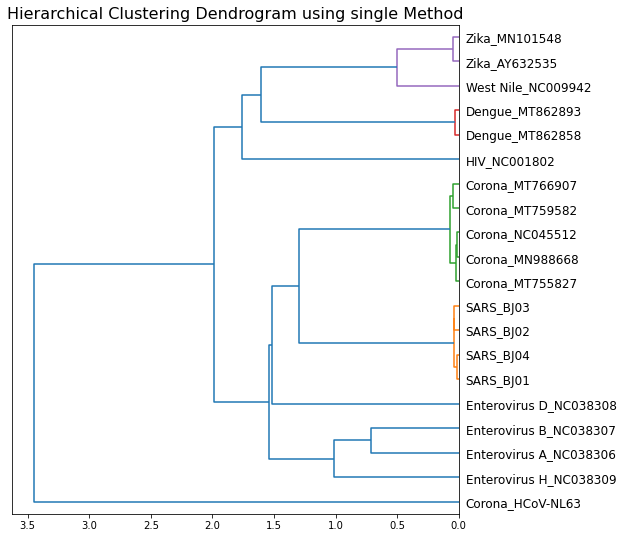

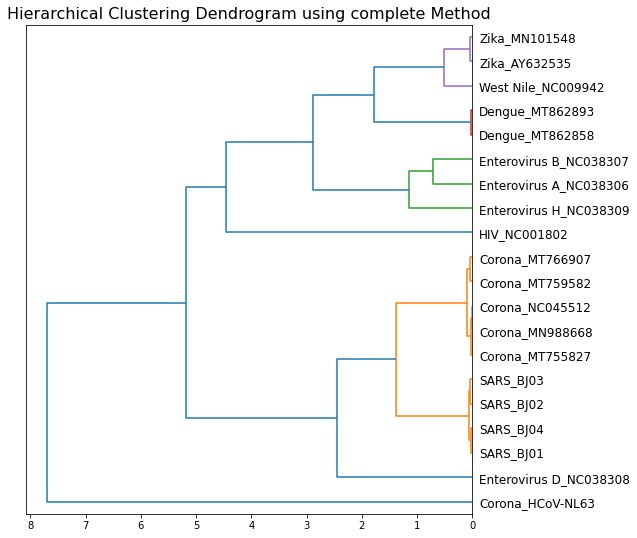

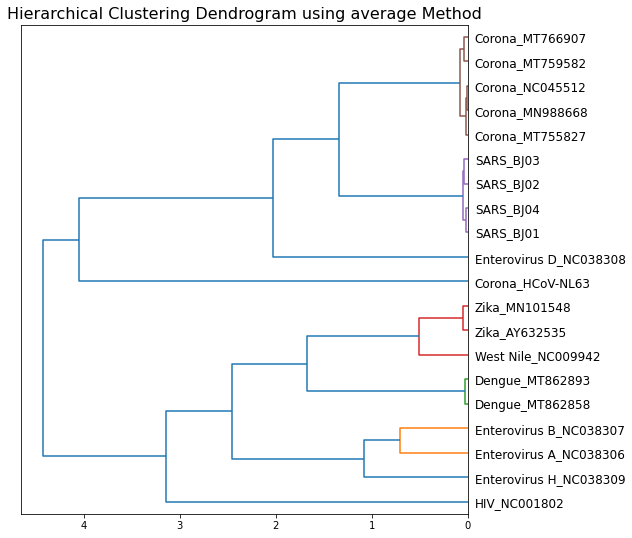

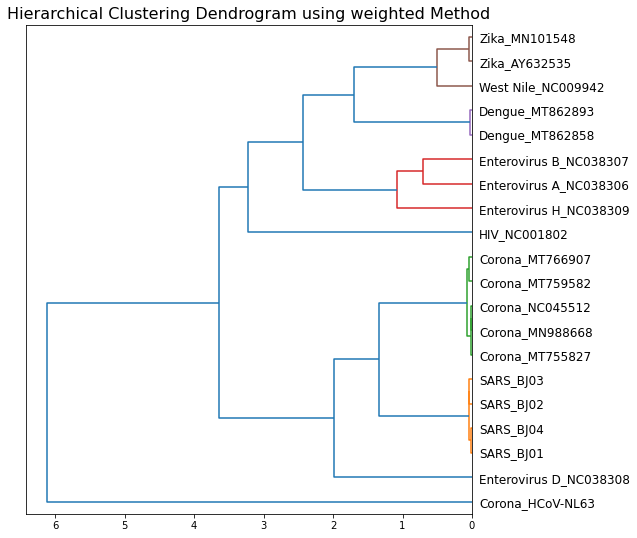

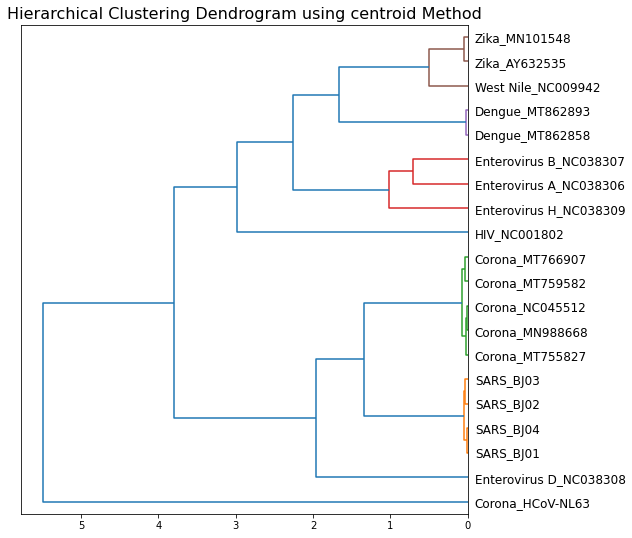

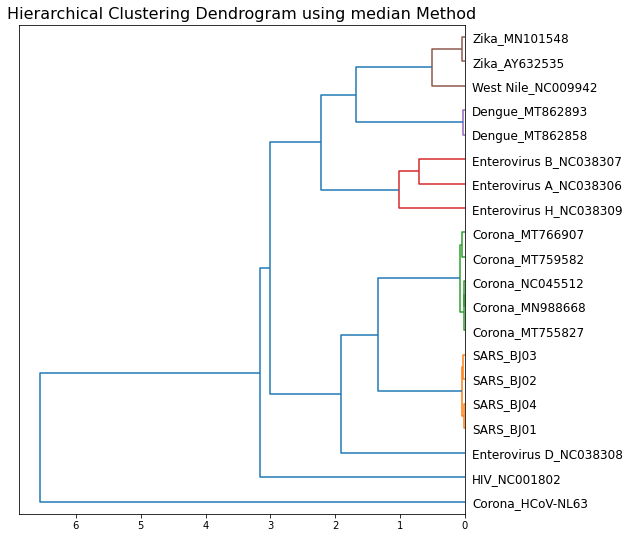

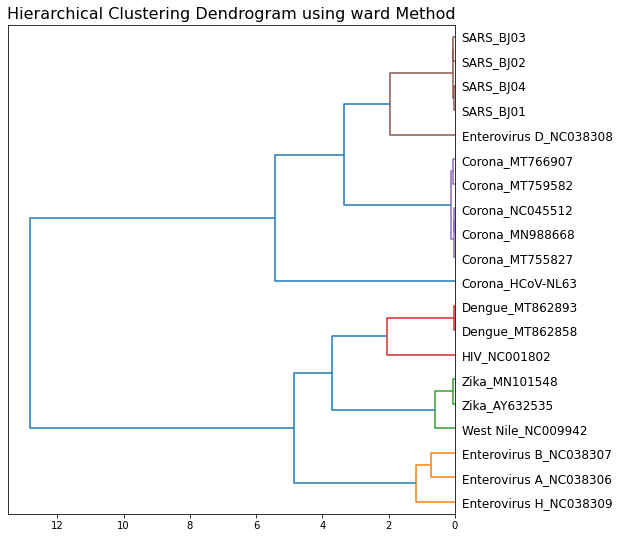

In [39]:
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
for m in methods:    
    linkage_matrix = linkage(mat2, method = m, metric='euclidean', optimal_ordering=False)
    y = 0
    plt.figure(figsize=(8, 9))
    plt.title('Hierarchical Clustering Dendrogram using ' + str(m) + ' Method', fontsize=16)
    dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
    plt.show()    